In [1]:
import numpy as np
import pandas as pd
data=pd.read_csv("stress.csv")

In [14]:
!pip install wordcloud

     ------------------------------------ 152.1/152.1 kB 336.1 kB/s eta 0:00:00


In [2]:
data.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [3]:
data.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,2838.000000,2838.000000,2838.000000,2.838000e+03,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,13751.999295,0.524313,0.808972,1.518107e+09,18.262156,4.684272,85.996124,35.240941,40.948231,67.044249,...,1.088001,1.120099,1.000211,1.722759,1.536400,1.879385,0.843517,9.948555,5.448836,0.040740
std,17340.161897,0.499497,0.177038,1.552209e+07,79.419166,3.316435,32.334887,26.486189,31.587117,32.880644,...,0.117159,0.085227,0.006500,0.047835,0.102971,0.058932,0.174794,21.798032,2.535829,0.195490
min,4.000000,0.000000,0.428571,1.483274e+09,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-1.918000,-1.000000
25%,926.250000,0.000000,0.600000,1.509698e+09,2.000000,2.464243,65.000000,12.410000,12.135000,41.070000,...,1.000000,1.000000,1.000000,1.691430,1.469745,1.841782,0.750000,2.000000,3.729973,-0.072222
50%,1891.500000,1.000000,0.800000,1.517066e+09,5.000000,4.321886,81.000000,29.420000,33.520000,80.710000,...,1.000000,1.142900,1.000000,1.721430,1.530295,1.878250,0.890000,5.000000,5.210000,0.044821
75%,25473.750000,1.000000,1.000000,1.530898e+09,10.000000,6.505657,101.000000,55.057500,69.320000,96.180000,...,1.142900,1.142900,1.000000,1.751760,1.596030,1.916243,1.000000,10.000000,6.855217,0.166667
max,55757.000000,1.000000,1.000000,1.542592e+09,1435.000000,24.074231,310.000000,99.000000,99.000000,99.000000,...,1.900000,1.500000,1.200000,2.007400,2.066670,2.158490,1.000000,416.000000,21.198919,1.000000


In [4]:
data.isnull()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2834,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2835,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2836,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
data.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [6]:
data.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,2838.000000,2838.000000,2838.000000,2.838000e+03,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,13751.999295,0.524313,0.808972,1.518107e+09,18.262156,4.684272,85.996124,35.240941,40.948231,67.044249,...,1.088001,1.120099,1.000211,1.722759,1.536400,1.879385,0.843517,9.948555,5.448836,0.040740
std,17340.161897,0.499497,0.177038,1.552209e+07,79.419166,3.316435,32.334887,26.486189,31.587117,32.880644,...,0.117159,0.085227,0.006500,0.047835,0.102971,0.058932,0.174794,21.798032,2.535829,0.195490
min,4.000000,0.000000,0.428571,1.483274e+09,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-1.918000,-1.000000
25%,926.250000,0.000000,0.600000,1.509698e+09,2.000000,2.464243,65.000000,12.410000,12.135000,41.070000,...,1.000000,1.000000,1.000000,1.691430,1.469745,1.841782,0.750000,2.000000,3.729973,-0.072222
50%,1891.500000,1.000000,0.800000,1.517066e+09,5.000000,4.321886,81.000000,29.420000,33.520000,80.710000,...,1.000000,1.142900,1.000000,1.721430,1.530295,1.878250,0.890000,5.000000,5.210000,0.044821
75%,25473.750000,1.000000,1.000000,1.530898e+09,10.000000,6.505657,101.000000,55.057500,69.320000,96.180000,...,1.142900,1.142900,1.000000,1.751760,1.596030,1.916243,1.000000,10.000000,6.855217,0.166667
max,55757.000000,1.000000,1.000000,1.542592e+09,1435.000000,24.074231,310.000000,99.000000,99.000000,99.000000,...,1.900000,1.500000,1.200000,2.007400,2.066670,2.158490,1.000000,416.000000,21.198919,1.000000


In [ ]:
#wordcloud is used to analyze text data through visualization in the form of tags, or words, where the importance of a word 
#is explained by its frequency.

#Stopwords are used to eliminate unimportant words, allowing applications to focus on the important words instead. ex-here feel
#one thing time want

#The process of stemming is used to normalize text and make it easier to process. It is an important step in text pre-processing
#and it is commonly used in information retrieval and text mining applications.

#NLTK (Natural Language Toolkit) is the go-to API for NLP (Natural Language Processing) with Python. It is a really powerful
# tool to preprocess text data for further analysis like with ML models for instance. It helps convert text into numbers,
# which the model can then easily work with.

#from nltk.corpus import stopwords. This is a list of lexical stop words in English. That is, these words are ignored during
#most natural language processing tasks, such as part-of-speech tagging, tokenization and parsing.
#exical definition specifies the meaning of an expression by stating it in terms of other expressions whose meaning is
#assumed to be known (e.g., a ewe is a female sheep).

#Stemming: It is the process of reducing the word to its word stem that affixes to suffixes and prefixes or to roots of words
# known as a lemma. In simple words stemming is reducing a word to its base word or stem in such a way that the words of similar
# kind lie under a common stem. For example – The words care, cared and caring lie under the same stem ‘care’. Stemming is 
# important in natural language processing(NLP).

In [9]:
import nltk
import re #Python has a module named re that is used for regular expressions in Python.
from nltk. corpus import stopwords
import string#The Python string module provides several constants that are useful for checking to see if a character, slice, or
#string contains letters, digits, symbols, etc.
nltk. download( 'stopwords' )
stemmer = nltk. SnowballStemmer("english")
stopword=set (stopwords . words ( 'english' ))
 
#we doing data cleaning here    
def clean(text):
    text = str(text) . lower()  #returns a string where all characters are lower case. Symbols and Numbers are ignored.
    text = re. sub('\[.*?\]',' ',text)  #substring and returns a string with replaced values.
    text = re. sub('https?://\S+/www\. \S+', ' ', text)#whitespace char with pattern
    text = re. sub('<. *?>+', ' ', text)#special char enclosed in square brackets
    text = re. sub(' [%s]' % re. escape(string. punctuation), ' ', text)#eliminate punctuation from string
    text = re. sub(' \n',' ', text)
    text = re. sub(' \w*\d\w*' ,' ', text)#word character ASCII punctuation
    text = [word for word in text. split(' ') if word not in stopword]  #removing stopwords
    text =" ". join(text)
    text = [stemmer . stem(word) for word in text. split(' ') ]#remove morphological affixes or action words from words
    text = " ". join(text)
    return text
data [ "text"] = data["text"]. apply(clean)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dodok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


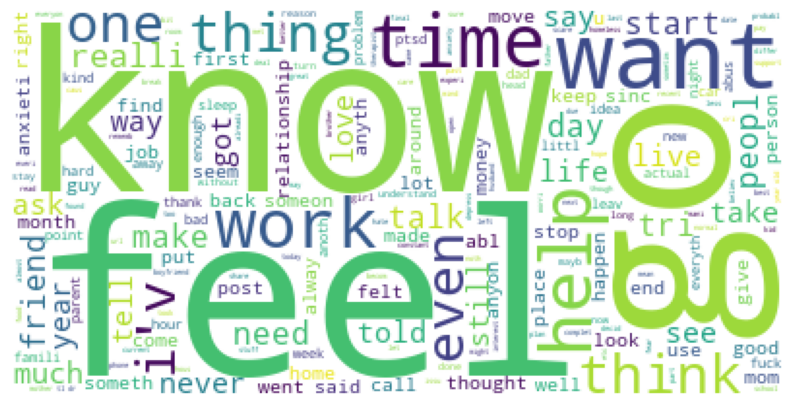

In [15]:
import matplotlib. pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ". join(i for i in data. text)
stopwords = set (STOPWORDS)#hor helping,felling is converted into word help,feel,etc using stopword
wordcloud = WordCloud( stopwords=stopwords,background_color="white") . generate(text)
plt. figure(figsize=(10, 10) )
plt. imshow(wordcloud )
plt. axis("off")
plt. show( )

#showing all textual data which have been morphological affixes have been removed

In [20]:
from sklearn. feature_extraction. text import CountVectorizer
from sklearn. model_selection import train_test_split

#creating an array of label and text

x = np.array (data["text"])
y = np.array (data["label"])#0 will reperresnt no stress and 1 will represent  stress in label values

cv = CountVectorizer ()  #map number of frequency count of word in every text
X = cv. fit_transform(x)
print(X)
xtrain, xtest, ytrain, ytest = train_test_split(X, y,test_size=0.33,random_state=42)
#if random_state is none then train and test set will get 0,0 value distribution where as if random_state is 42 then train and
#test set will get 42,42

  (0, 7346)	1
  (0, 3226)	1
  (0, 9392)	1
  (0, 814)	1
  (0, 8301)	1
  (0, 3697)	1
  (0, 7155)	1
  (0, 8846)	1
  (0, 252)	1
  (0, 9683)	1
  (0, 4250)	1
  (0, 4980)	1
  (0, 5272)	1
  (0, 2141)	1
  (0, 5066)	1
  (0, 3213)	1
  (0, 2543)	3
  (0, 4135)	1
  (0, 5263)	1
  (0, 3644)	1
  (0, 8281)	1
  (0, 6803)	1
  (0, 4097)	1
  (0, 5121)	1
  (0, 1782)	1
  :	:
  (2836, 830)	1
  (2836, 4502)	1
  (2836, 2875)	1
  (2836, 4562)	1
  (2836, 4731)	1
  (2836, 4458)	1
  (2837, 7346)	2
  (2837, 2966)	1
  (2837, 5479)	2
  (2837, 8722)	1
  (2837, 8443)	1
  (2837, 6714)	1
  (2837, 4265)	1
  (2837, 9579)	1
  (2837, 5515)	1
  (2837, 8819)	1
  (2837, 5659)	1
  (2837, 2537)	1
  (2837, 7409)	1
  (2837, 2302)	1
  (2837, 7746)	1
  (2837, 2706)	1
  (2837, 8818)	1
  (2837, 5405)	1
  (2837, 2968)	1


In [21]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
model.fit(xtrain,ytrain)

BernoulliNB()

In [26]:
user=input("Enter the text")#taking input from user in the form of text
data=cv.transform([user]).toarray()#here text input from user is coverted to vector using cv.transform to array and stred in data
output=model.predict(data)#now this data is used to predict the model
print(output)
#I think we need to take care of ourselves = no stress =0
#sometimes i feel that i need some help =stress =1

Enter the textsometimes, I feel that I need some help
[1]
